## Plotting batch results for training with injected errors

In [40]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import error_inject_layer
import dense_error_injection
import error_inject_optimizer
from tensorflow.python.util import deprecation
print(tf.__version__)

2.5.0


In [41]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Load Data

In [42]:
sample_size_0_error_train_history = np.load('batch_results/sample_size_train_history_error_rate_0.npy', allow_pickle=True, fix_imports=True)
sample_size_00001_error_train_history = np.load('batch_results/sample_size_train_history_error_rate_00001.npy', allow_pickle=True, fix_imports=True)
sample_size_0005_error_train_history = np.load('batch_results/sample_size_train_history_error_rate_0005.npy', allow_pickle=True, fix_imports=True)
sample_size_0001_error_train_history = np.load('batch_results/sample_size_train_history_error_rate_0001.npy', allow_pickle=True, fix_imports=True)
sample_size_00001_error_dropout_20_train_history = np.load('batch_results/sample_size_train_history_error_rate_00001_dropout_20.npy', allow_pickle=True, fix_imports=True)
sample_size_00001_error_dropout_40_train_history = np.load('batch_results/sample_size_train_history_error_rate_00001_dropout_40.npy', allow_pickle=True, fix_imports=True)

In [43]:
sample_size_0_error_train_history = sample_size_0_error_train_history.reshape(1)[0]
sample_size_00001_error_train_history = sample_size_00001_error_train_history.reshape(1)[0]
sample_size_0005_error_train_history = sample_size_0005_error_train_history.reshape(1)[0]
sample_size_0001_error_train_history = sample_size_0001_error_train_history.reshape(1)[0]

sample_size_00001_error_dropout_20_train_history = sample_size_00001_error_dropout_20_train_history.reshape(1)[0]
sample_size_00001_error_dropout_40_train_history = sample_size_00001_error_dropout_40_train_history.reshape(1)[0]

In [44]:
print(len(sample_size_0_error_train_history[1000]['training_accuracy']))
print(len(sample_size_0005_error_train_history[1000]['training_accuracy']))
print(len(sample_size_0001_error_train_history[1000]['training_accuracy']))
print(len(sample_size_00001_error_train_history[1000]['training_accuracy']))
print(len(sample_size_00001_error_dropout_20_train_history[1000]['training_accuracy']))
print(len(sample_size_00001_error_dropout_40_train_history[1000]['training_accuracy']))
# print(len(sample_size_0005_error_train_history[1000]['training_accuracy']))

20
20
20
20
10
10


### Average Data across iterations

In [45]:
def  average_epochs(epoch_history, sample_sizes, epochs, iterations, metric):
  average_epoch_values = {}
  for sample_size in sample_sizes:
    average_epoch_values[sample_size] = [None] * 500
  
  for sample_size in sample_sizes:
    for i in range(0,epochs):
      epoch_sum = 0
      for j in range(0,iterations):
        epoch_sum += epoch_history[sample_size][metric][j][i]
      average_epoch_values[sample_size][i] = epoch_sum/iterations
  return average_epoch_values

In [46]:
sample_sizes = list(sample_size_0_error_train_history.keys())
sample_sizes

[1000, 5000, 10000, 30000, 60000]

In [47]:
sample_sizes = list(sample_size_0_error_train_history.keys())
iterations = len(sample_size_0_error_train_history[1000]['training_accuracy'])
epochs = 500
average_training_accuracy_error_0 = average_epochs(sample_size_0_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'training_accuracy')

average_validation_accuracy_error_0 = average_epochs(sample_size_0_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'validation_accuracy')

In [48]:
sample_sizes = list(sample_size_00001_error_train_history.keys())
iterations = len(sample_size_00001_error_train_history[1000]['training_accuracy'])
epochs = 500
average_training_accuracy_error_00001 = average_epochs(sample_size_00001_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'training_accuracy')

average_validation_accuracy_error_00001 = average_epochs(sample_size_00001_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'validation_accuracy')

In [49]:
sample_sizes = list(sample_size_0005_error_train_history.keys())
iterations = len(sample_size_0005_error_train_history[1000]['training_accuracy'])
epochs = 500
average_training_accuracy_error_0005 = average_epochs(sample_size_0005_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'training_accuracy')

average_validation_accuracy_error_0005 = average_epochs(sample_size_0005_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'validation_accuracy')

In [50]:
sample_sizes = list(sample_size_0001_error_train_history.keys())
iterations = len(sample_size_0001_error_train_history[1000]['training_accuracy'])
epochs = 500
average_training_accuracy_error_0001 = average_epochs(sample_size_0001_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'training_accuracy')

average_validation_accuracy_error_0001 = average_epochs(sample_size_0001_error_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'validation_accuracy')

In [51]:
sample_sizes = list(sample_size_00001_error_dropout_20_train_history.keys())
iterations = len(sample_size_00001_error_dropout_20_train_history[1000]['training_accuracy'])
epochs = 500
average_training_accuracy_error_00001_dropout_20 = average_epochs(sample_size_00001_error_dropout_20_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'training_accuracy')

average_validation_accuracy_error_00001_dropout_20 = average_epochs(sample_size_00001_error_dropout_20_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'validation_accuracy')

In [52]:
sample_sizes = list(sample_size_00001_error_dropout_40_train_history.keys())
iterations = len(sample_size_00001_error_dropout_40_train_history[1000]['training_accuracy'])
epochs = 500
average_training_accuracy_error_00001_dropout_40 = average_epochs(sample_size_00001_error_dropout_40_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'training_accuracy')

average_validation_accuracy_error_00001_dropout_40 = average_epochs(sample_size_00001_error_dropout_40_train_history, 
                                                   sample_sizes, 
                                                   epochs, 
                                                   iterations, 
                                                   'validation_accuracy')

## PlotTraining/Validation Accuracy

### Error 0

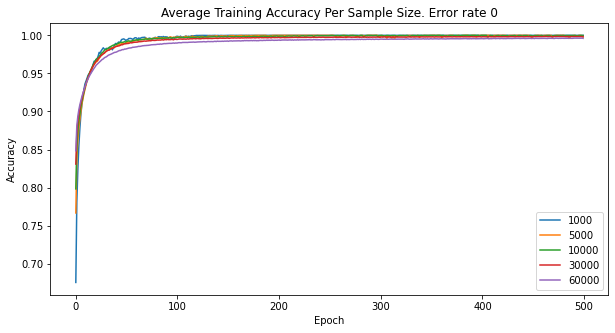

In [53]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_training_accuracy_error_0[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Average Training Accuracy Per Sample Size. Error rate 0')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

# plt.show()
plt.savefig('figures/batch_results_figures/model_training_accuracy_by_sample_size_error_0.png',dpi=1000, bbox_inches='tight')

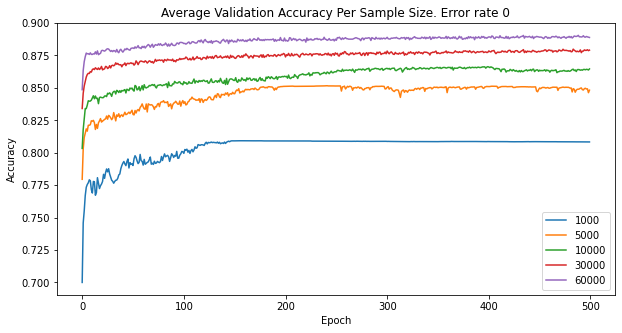

In [54]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_validation_accuracy_error_0[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Average Validation Accuracy Per Sample Size. Error rate 0')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_validation_accuracy_by_sample_size_error_0.png',dpi=1000, bbox_inches='tight')

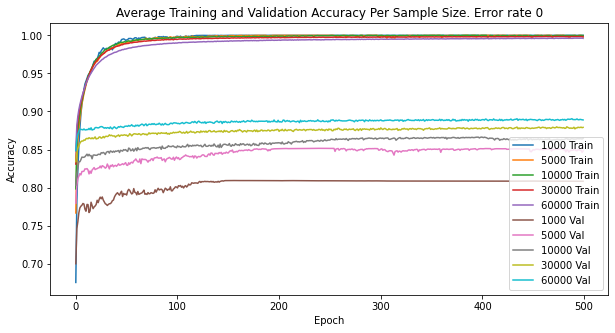

In [55]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_training_accuracy_error_0[sample_size])
  
for sample_size in sample_sizes:
  plt.plot(average_validation_accuracy_error_0[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Average Training and Validation Accuracy Per Sample Size. Error rate 0')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['1000 Train', '5000 Train', '10000 Train', '30000 Train', '60000 Train',
            '1000 Val', '5000 Val', '10000 Val', '30000 Val', '60000 Val'])

plt.savefig('figures/batch_results_figures/model_training_and_validation_accuracy_by_sample_size_error_0.png',dpi=1000, bbox_inches='tight')

### Error 0.00001

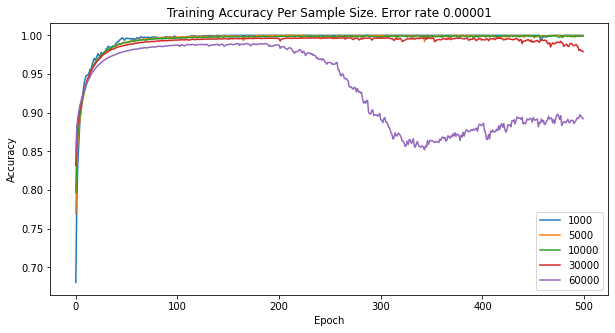

In [75]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_training_accuracy_error_00001[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Training Accuracy Per Sample Size. Error rate 0.00001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_training_accuracy_by_sample_size_error_00001.png', dpi=1000, bbox_inches='tight')

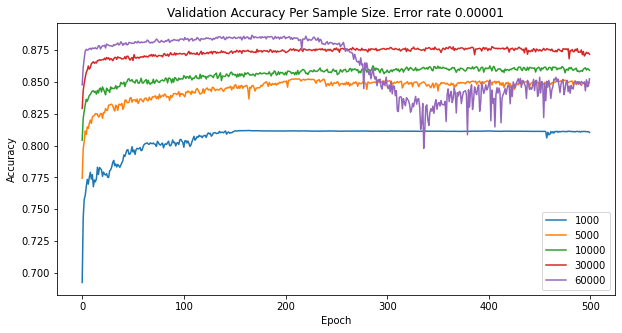

In [74]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_validation_accuracy_error_00001[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy Per Sample Size. Error rate 0.00001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_validation_accuracy_by_sample_size_error_00001.png', dpi=1000, bbox_inches='tight')

### Error 0.0001

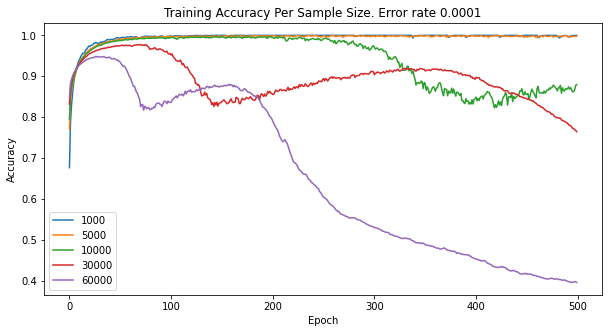

In [58]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_training_accuracy_error_0001[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Training Accuracy Per Sample Size. Error rate 0.0001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_training_accuracy_by_sample_size_error_0001.png', dpi=1000, bbox_inches='tight')

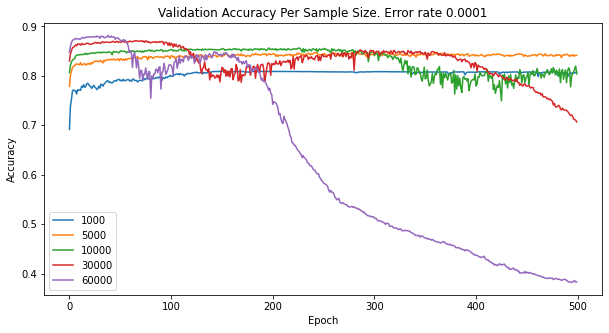

In [59]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_validation_accuracy_error_0001[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy Per Sample Size. Error rate 0.0001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_validation_accuracy_by_sample_size_error_0001.png', dpi=1000, bbox_inches='tight')

### Error 0.0005

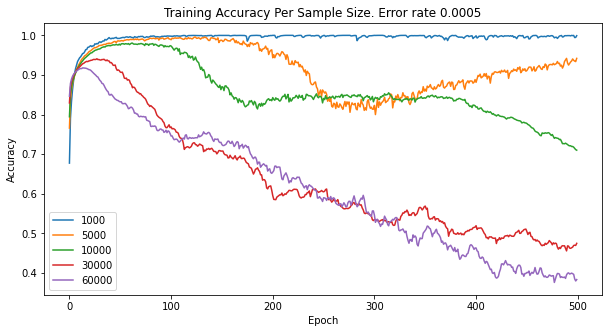

In [60]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_training_accuracy_error_0005[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Training Accuracy Per Sample Size. Error rate 0.0005')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_training_accuracy_by_sample_size_error_0005.png', dpi=1000, bbox_inches='tight')

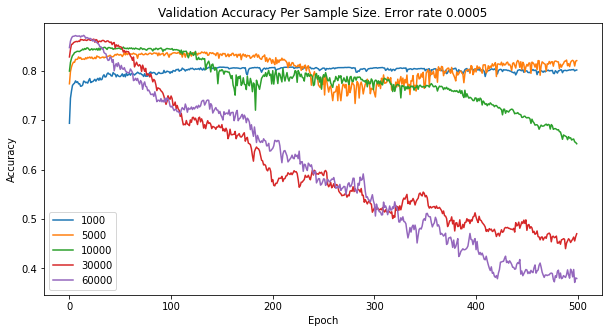

In [61]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_validation_accuracy_error_0005[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy Per Sample Size. Error rate 0.0005')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_validation_accuracy_by_sample_size_error_0005.png', dpi=1000, bbox_inches='tight')

### Error 0.00001, Dropout 0.20

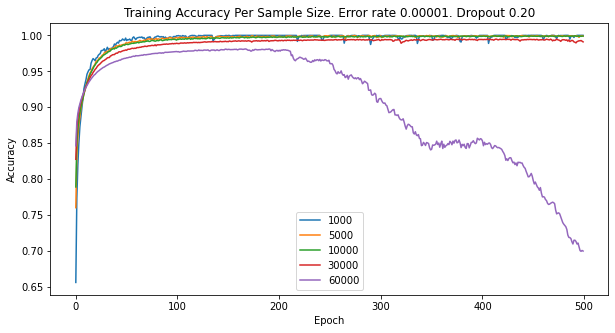

In [62]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_training_accuracy_error_00001_dropout_20[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Training Accuracy Per Sample Size. Error rate 0.00001. Dropout 0.20')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_training_accuracy_by_sample_size_error_00001_dropout_20.png', dpi=1000, bbox_inches='tight')

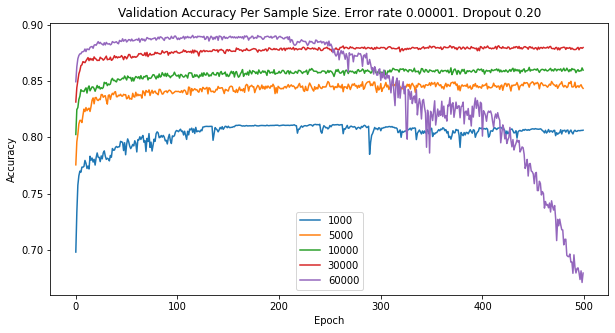

In [63]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_validation_accuracy_error_00001_dropout_20[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy Per Sample Size. Error rate 0.00001. Dropout 0.20')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_validation_accuracy_by_sample_size_error_00001_dropout_20.png', dpi=1000, bbox_inches='tight')

#### Error 0.00001, Dropout 0.40

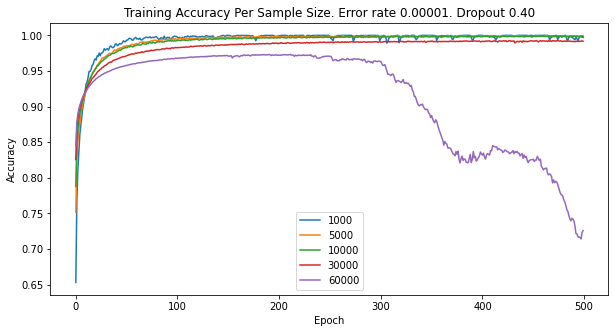

In [64]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_training_accuracy_error_00001_dropout_40[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Training Accuracy Per Sample Size. Error rate 0.00001. Dropout 0.40')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_training_accuracy_by_sample_size_error_00001_dropout_40.png', dpi=1000, bbox_inches='tight')

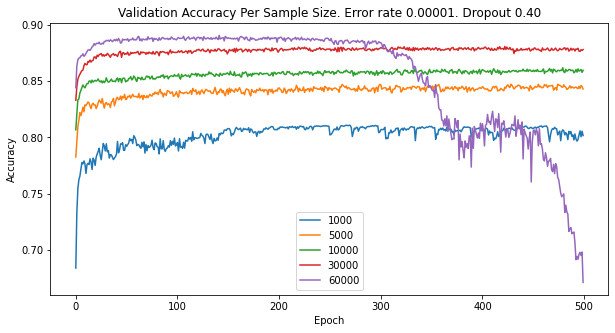

In [65]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
for sample_size in sample_sizes:
  plt.plot(average_validation_accuracy_error_00001_dropout_40[sample_size])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy Per Sample Size. Error rate 0.00001. Dropout 0.40')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([1000, 5000, 10000, 30000, 60000])

plt.savefig('figures/batch_results_figures/model_validation_accuracy_by_sample_size_error_00001_dropout_40.png', dpi=1000, bbox_inches='tight')

### Accuracy per Sample Size

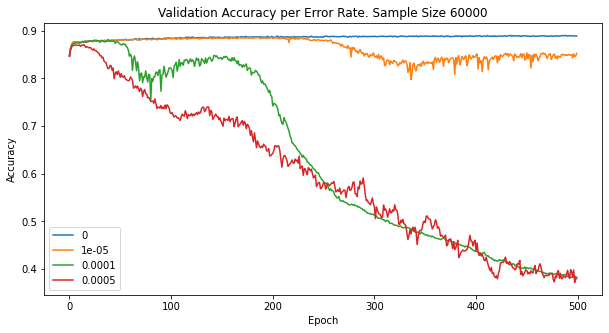

In [66]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
plt.plot(average_validation_accuracy_error_0[60000])
plt.plot(average_validation_accuracy_error_00001[60000])
plt.plot(average_validation_accuracy_error_0001[60000])
plt.plot(average_validation_accuracy_error_0005[60000])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy per Error Rate. Sample Size 60000')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([0, 0.00001, 0.0001, 0.0005])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_error_rate_sample_size_60000.png', dpi=1000, bbox_inches='tight')

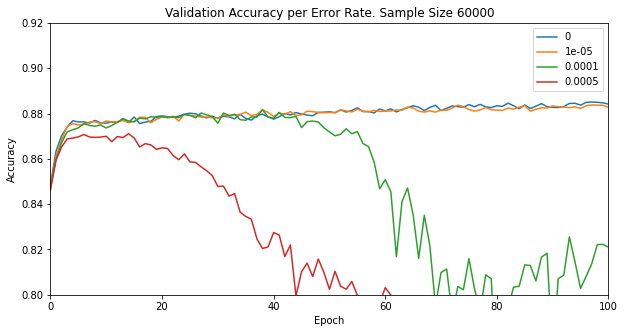

In [67]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
plt.plot(average_validation_accuracy_error_0[60000])
plt.plot(average_validation_accuracy_error_00001[60000])
plt.plot(average_validation_accuracy_error_0001[60000])
plt.plot(average_validation_accuracy_error_0005[60000])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy per Error Rate. Sample Size 60000')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.8,0.92)
plt.xlim(0,100)
plt.legend([0, 0.00001, 0.0001, 0.0005])

plt.show()

### Accuracy with different drop rates

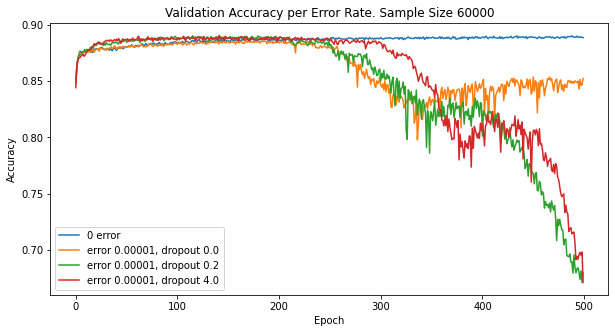

In [68]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
plt.plot(average_validation_accuracy_error_0[60000])
plt.plot(average_validation_accuracy_error_00001[60000])
plt.plot(average_validation_accuracy_error_00001_dropout_20[60000])
plt.plot(average_validation_accuracy_error_00001_dropout_40[60000])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy per Error Rate. Sample Size 60000')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['0 error', 'error 0.00001, dropout 0.0', 'error 0.00001, dropout 0.2', 'error 0.00001, dropout 4.0'])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_dropout_rate_sample_size_60000.png', dpi=1000, bbox_inches='tight')

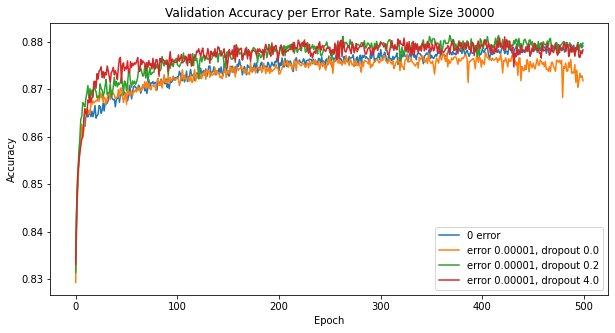

In [69]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
plt.plot(average_validation_accuracy_error_0[30000])
plt.plot(average_validation_accuracy_error_00001[30000])
plt.plot(average_validation_accuracy_error_00001_dropout_20[30000])
plt.plot(average_validation_accuracy_error_00001_dropout_40[30000])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy per Error Rate. Sample Size 30000')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['0 error', 'error 0.00001, dropout 0.0', 'error 0.00001, dropout 0.2', 'error 0.00001, dropout 4.0'])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_dropout_rate_sample_size_30000.png', dpi=1000, bbox_inches='tight')

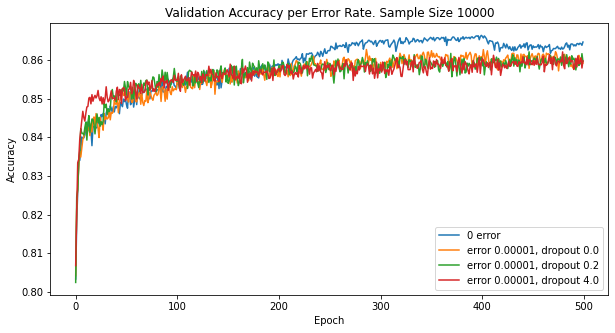

In [70]:
# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
plt.plot(average_validation_accuracy_error_0[10000])
plt.plot(average_validation_accuracy_error_00001[10000])
plt.plot(average_validation_accuracy_error_00001_dropout_20[10000])
plt.plot(average_validation_accuracy_error_00001_dropout_40[10000])
# plt.plot(sample_size_train_history[1][1])
# plt.plot(sample_size_train_history[2][1])
# plt.plot(sample_size_train_history[3][1])
# plt.plot(sample_size_train_history[4][1])
# plt.plot(error_rate_train_history[5][1])
plt.title('Validation Accuracy per Error Rate. Sample Size 10000')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['0 error', 'error 0.00001, dropout 0.0', 'error 0.00001, dropout 0.2', 'error 0.00001, dropout 4.0'])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_dropout_rate_sample_size_10000.png', dpi=1000, bbox_inches='tight')

### Accuracy of each iterations

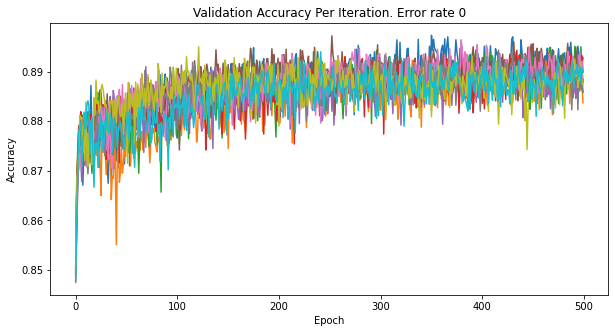

In [76]:
sample_size_0005_error_train_history

# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
for i in range(0,10):
  plt.plot(sample_size_0_error_train_history[60000]['validation_accuracy'][i])

plt.title('Validation Accuracy Per Iteration. Error rate 0')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend([0, 0.00001, 0.0005])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_iteration_error_0.png', dpi=1000, bbox_inches='tight')

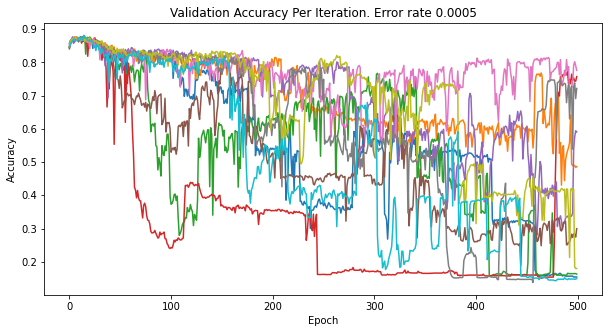

In [77]:
sample_size_0005_error_train_history

# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
for i in range(0,10):
  plt.plot(sample_size_0005_error_train_history[60000]['validation_accuracy'][i])

plt.title('Validation Accuracy Per Iteration. Error rate 0.0005')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend([0, 0.00001, 0.0005])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_iteration_error_0005.png', dpi=1000, bbox_inches='tight')

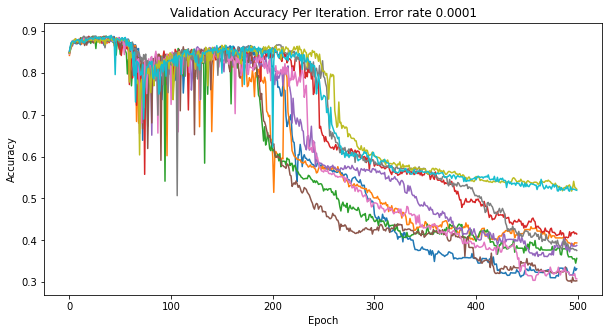

In [79]:
sample_size_0005_error_train_history

# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
for i in range(0,10):
  plt.plot(sample_size_0001_error_train_history[60000]['validation_accuracy'][i])

plt.title('Validation Accuracy Per Iteration. Error rate 0.0001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend([0, 0.00001, 0.0005])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_iteration_error_0001.png', dpi=1000, bbox_inches='tight')

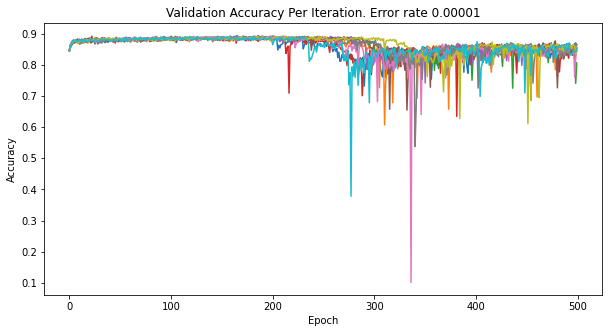

In [78]:
sample_size_0005_error_train_history

# plt.plot(train_history.history['loss'])
plt.figure(figsize=(10, 5))
# for sample_size in sample_sizes:
for i in range(0,10):
  plt.plot(sample_size_00001_error_train_history[60000]['validation_accuracy'][i])

plt.title('Validation Accuracy Per Iteration. Error rate 0.00001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend([0, 0.00001, 0.0005])

plt.savefig('figures/batch_results_figures/validation_accuracy_per_iteration_error_00001.png', dpi=1000, bbox_inches='tight')